In [2]:
import pandas as pd
ab = pd.read_csv('CTR_Sim.csv') #,names=['Control','Test']

In [3]:
ab

,Clicks Conv,Clicks,Weekend
0,11,19,0
1,10,20,0
2,11,17,0
3,15,14,0
4,11,18,0
5,30,21,1
6,22,26,1
7,15,19,0
8,12,17,0
9,14,19,0


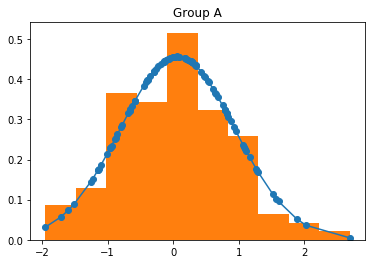

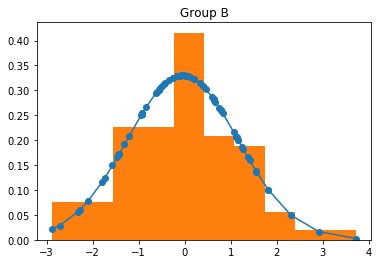

nan nan


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in double_scalars


(nan, nan)

In [5]:
import numpy as np
import scipy.stats as stats
import pylab as pl
%matplotlib inline

# running a t-test

# Generate data
a = sorted(np.random.randn(100))
b = sorted(np.random.randn(1) * np.random.randn(80))

# Plot distribution of A
fit = stats.norm.pdf(a, np.mean(a), np.std(a))
pl.plot(a,fit,'-o')
pl.hist(a,normed=True) 
pl.title('Group A')
pl.show()

# Plot distribution of B
fit = stats.norm.pdf(b, np.mean(b), np.std(b))
pl.plot(b,fit,'-o')
pl.hist(b,normed=True) 
pl.title('Group B')
pl.show()

# Perform T-test
stats.ttest_ind(a, b)

# null hypothesis: the samples have identical averages
# if p<0.05, reject null hypothesis that the two samples are identical

# ztest
def ztest(x1, n1, x2, n2, one_tailed=False):
    """
    One- or Two-Tailed Z-test for two samples
    
    Args:
        x1 = # of successes in Sample 1
        n1 = # of observations in Sample 1
        x2 = # of successes in Sample 2
        n2 = # of observations in Sample 2
        one_tailed = Boolean, whether or not the test should be One-Tailed
        
    Return:
        z = Z-stat
    """
    p1 = x1 / n1
    p2 = x2 / n2    
 
    p = (x1 + x2) / (n1 + n2)
    se = p * (1 - p) * ((1 / n1) + (1/ n2))
    sse = np.sqrt(se)
    
    z = (p1 - p2) / sse
    p = 1 - stats.norm.cdf(abs(z))
    
    if not one_tailed:
        p *= 2
    print z, p
    return z, p

# Do a test with fake data:

control_observations = 3141 #n1
control_successes = 1904 # x1
test_observations = 3241 #n2
test_successes = 2134 #x2

ztest(control_successes, control_observations, test_successes, test_observations, one_tailed=False)